In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [54]:
# set the display width of column to 1000 characters
pd.set_option("display.width", 1000)

# Load the audible_raw.csv file
audible = pd.read_csv("audible_uncleaned.csv")
# View the first rows of the dataframe
print(audible.head(0))

Empty DataFrame
Columns: [name, author, narrator, time, releasedate, language, stars, price]
Index: []


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [55]:
# Inspect the columns' data types
print(audible.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [56]:
# Remove Writtenby: from the author column
audible["author"] = audible["author"].str.replace("Writtenby:", "", regex=True)
# Remove Narratedby: from the narrator column
audible["narrator"] = audible["narrator"].str.replace("Narratedby:", "", regex=True)
# Check the results
print(audible[audible["author"].str.contains("Writtenby:", na=False)])
print(audible[audible["narrator"].str.contains("Narratedby:", na=False)])

Empty DataFrame
Columns: [name, author, narrator, time, releasedate, language, stars, price]
Index: []
Empty DataFrame
Columns: [name, author, narrator, time, releasedate, language, stars, price]
Index: []


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [57]:
# Get a glimpse of the stars column
print(audible["stars"].sample())

13817    5 out of 5 stars7 ratings
Name: stars, dtype: object


Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [58]:
# Explore the values of the star column that are not 'Not rated yet'
print(audible.loc[audible["stars"] == "Not rated yet"])

                                                    name          author                                 narrator               time releasedate language          stars     price
34     14 Short Stories Bundle for Kids: Adventure, S...  NayomiPhillips  MonicaRachelle,JimD.Johnston,KatieOtten  3 hrs and 13 mins    22-01-19  English  Not rated yet    501.00
50                              A Bear Called Paddington     MichaelBond                               StephenFry  2 hrs and 39 mins    24-06-08  English  Not rated yet    266.00
51                Gregor and the Curse of the Warmbloods  SuzanneCollins                              PaulBoehmer  7 hrs and 47 mins    26-12-04  English  Not rated yet  1,005.00
61                                     Across the Desert    DustiBowling                            StacyGonzalez  6 hrs and 13 mins    29-03-22  English  Not rated yet    703.00
62                     Unicorn Academy: Aisha and Silver      JulieSykes                          Kristin

As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [59]:
# Replace 'Not rated yet' with NaN
audible.loc[audible["stars"] == "Not rated yet", "stars"] = np.nan

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [60]:
# Extract number of stars into rating_stars and turn into float
audible["rating_stars"] = audible["stars"].str.extract(r'(\d+\.\d+|\d+)').astype(float)
# Replace the comma, extract number of ratings into n_ratings and turn into float
audible["n_ratings"] = audible["stars"].str.replace(",","").str.extract(r'(\d+)\sratings$').astype(float)
# Examine the new rating_stars and n_ratings columns
print(audible["rating_stars"].dtype)
print(audible["n_ratings"].dtype)

float64
float64


As a last step, let's delete the `stars` column using the `.drop` command:

In [61]:
# Drop the stars column
audible.drop(columns=["stars"], inplace=True)
# Check the results
print(audible.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          87489 non-null  object 
 1   author        87489 non-null  object 
 2   narrator      87489 non-null  object 
 3   time          87489 non-null  object 
 4   releasedate   87489 non-null  object 
 5   language      87489 non-null  object 
 6   price         87489 non-null  object 
 7   rating_stars  15072 non-null  float64
 8   n_ratings     9250 non-null   float64
dtypes: float64(2), object(7)
memory usage: 6.0+ MB
None


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [62]:
# Explore the price column
print(audible["price"].head())

0    468.00
1    820.00
2    410.00
3    615.00
4    820.00
Name: price, dtype: object


We need to get rid of the comma and the word 'Free' before we can convert the data.

In [63]:
# Replace the comma with ''
audible["price"] = audible["price"].str.replace(',', '')
# Replace 'Free' with 0
# audible["price"] = audible["price"].str.replace('Free', 0)
audible.loc[audible["price"] == "Free", "price"] = 0
# Turn price to float
audible["price"] = audible["price"].astype(float)

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [64]:
# Look at the unique values in the rating_stars column
print(audible["rating_stars"].unique())

[5.  4.5 4.  nan 3.5 3.  1.  2.  2.5 1.5]


We can now use `.astype` to change the data type.

In [65]:
# Turn rating_stars to category
audible["rating_stars"] = audible["rating_stars"].astype('category')

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [66]:
# Convert releasedate to datetime
audible["releasedate"] = pd.to_datetime(audible["releasedate"])
# Inspect the dataframe 
print(audible.info())

C:\Users\Dell\AppData\Local\Temp\ipykernel_13420\919953980.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible["releasedate"] = pd.to_datetime(audible["releasedate"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     9250 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB
None


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [67]:
# Explore the values in the time column
print(audible["time"].head())

0     2 hrs and 20 mins
1     13 hrs and 8 mins
2      2 hrs and 3 mins
3    11 hrs and 16 mins
4                10 hrs
Name: time, dtype: object


Let's see what other ways they have encoded `min` or `minutes`:

In [68]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
print(audible.loc[audible["time"].str.contains(r'min|mins|minutes', na=False), "time"])

0         2 hrs and 20 mins
1         13 hrs and 8 mins
2          2 hrs and 3 mins
3        11 hrs and 16 mins
5        10 hrs and 35 mins
                ...        
87484     7 hrs and 34 mins
87485     10 hrs and 7 mins
87486     19 hrs and 4 mins
87487      4 hrs and 8 mins
87488       6 hrs and 1 min
Name: time, Length: 86146, dtype: object


We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [69]:
# Replace hrs, mins, and 'Less than 1 minute'
audible["time"] = audible["time"].str.replace(r"\bhrs?\b", "hr", regex=True)
audible["time"] = audible["time"].str.replace(r"\bmins?\b", "min", regex=True)
audible.loc[audible["time"].str.contains(r"Less than 1 min", na=False), "time"] = "1 min"

Let's see how it looks now:

In [70]:
# Check the results
print(audible["time"].head())

0     2 hr and 20 min
1     13 hr and 8 min
2      2 hr and 3 min
3    11 hr and 16 min
4               10 hr
Name: time, dtype: object


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [71]:
# Extract the number of hours, turn to integer
audible["hours"] = audible["time"].str.extract(r'(\d+)\s*hr').fillna(0).astype(int)
# Extract the number of minutes, turn to integer
audible["mins"] = audible["time"].str.extract(r'(\d+)\s*min').fillna(0).astype(int)
# Combine hours and minutes into the time_mins column
audible["time_mins"] = (audible["hours"]*60) + audible["mins"]
# Check the results
print(audible["time_mins"].head())

0    140
1    788
2    123
3    676
4    600
Name: time_mins, dtype: int64


And as final step, let's delete the columns we don't need any more:

In [72]:
# Drop the time column
audible.drop(columns=["time"], inplace=True)

Here is how our dataframe looks now:

In [73]:
# Inspect the dataframe 
print(audible.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   n_ratings     9250 non-null   float64       
 8   hours         87489 non-null  int64         
 9   mins          87489 non-null  int64         
 10  time_mins     87489 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 6.8+ MB
None


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

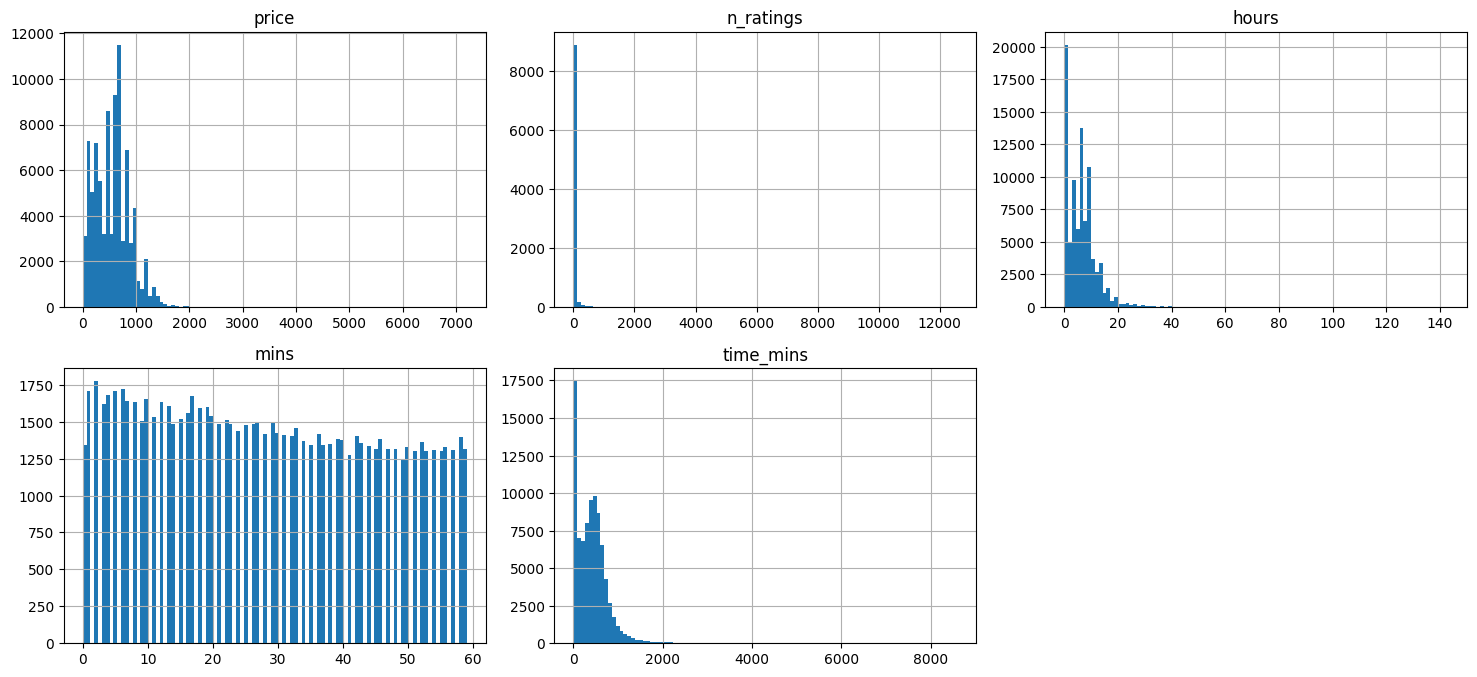

In [74]:
# Select only the numerical columns
numerical_columns = audible.select_dtypes(include=['float64', 'int64'])

# Plot histograms for each numerical column
numerical_columns.hist(bins=100, figsize=(15, 10), layout=(3, 3))

plt.tight_layout()
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [75]:
# Look at the numeric columns
print(numerical_columns.describe())

              price     n_ratings         hours          mins     time_mins
count  87489.000000   9250.000000  87489.000000  87489.000000  87489.000000
mean     559.009246     34.587243      6.489570     28.123456    417.497663
std      336.096642    264.025444      6.060178     17.337883    364.559399
min        0.000000      2.000000      0.000000      0.000000      1.000000
25%      268.000000      2.000000      2.000000     13.000000    142.000000
50%      585.000000      5.000000      6.000000     27.000000    386.000000
75%      755.000000     14.000000      9.000000     43.000000    584.000000
max     7198.000000  12573.000000    143.000000     59.000000   8595.000000


In [76]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [77]:
# Transform prices to USD (multiply times 0.012)
audible["price"] = audible["price"] * 0.012
# Check the results
print(audible["price"].describe())

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64


There values in the `language` column have different capitalization. Let's fix that.

In [78]:
# Inspect the language column before making changes
audible.language.head()

0    English
1    English
2    English
3    English
4    English
Name: language, dtype: object

In [79]:
# Update capitalization in the language column
audible["language"] = audible["language"].str.capitalize()
# Check the results
print(audible["language"].unique())

['English' 'Hindi' 'Spanish' 'German' 'French' 'Catalan' 'Swedish'
 'Italian' 'Danish' 'Finnish' 'Dutch' 'Hebrew' 'Russian' 'Polish'
 'Galician' 'Afrikaans' 'Icelandic' 'Romanian' 'Japanese' 'Tamil'
 'Portuguese' 'Urdu' 'Hungarian' 'Czech' 'Bulgarian' 'Mandarin_chinese'
 'Basque' 'Korean' 'Arabic' 'Greek' 'Turkish' 'Ukrainian' 'Slovene'
 'Norwegian' 'Telugu' 'Lithuanian']


## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [80]:
# Look for duplicate rows
print(audible.duplicated().sum())

0


It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [81]:
# Create a list of our subset columns and assign to subset_cols
subset = ["name", "author", "narrator", "time_mins", "price"]
# Check for duplicates using our subset of columns
print(audible.duplicated(subset=subset))

0        False
1        False
2        False
3        False
4        False
         ...  
87484    False
87485    False
87486    False
87487    False
87488    False
Length: 87489, dtype: bool


Let's look at those values (use `keep=false`) and see what is going on:

In [82]:
# Check the duplicated rows keeping the duplicates and order by the name column
print(audible[audible.duplicated(subset=subset)].sort_values(by="name"))

                                              name                    author       narrator releasedate language   price rating_stars  n_ratings  hours  mins  time_mins
63978      "Das Böse ist des Menschen beste Kraft"         ChristianLiederer   ThomasKrause  2021-12-14   German   2.796          NaN        NaN      2    24        144
24625                         90 Minutes in Heaven     DonPiper,CecilMurphey       DonPiper  2015-09-25  English   7.032          NaN        NaN      8    15        495
16971                                 Adagio in Dm                 BillBrown      BillBrown  2021-06-08  English   5.472          NaN        NaN      1    18         78
69956                                     Ambiance                RasmusBroe     RasmusBroe  2021-06-16   French   2.700          NaN        NaN      4    29        269
62272                                Atomic Habits                JamesClear     JamesClear  2018-10-18  English   9.840          5.0    12573.0      5    

We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [83]:
# Drop duplicated rows keeping the last release date
# The parameter keep="last" means that in case of duplicates, the last occurrence will be kept.
audible.drop_duplicates(subset=subset, keep="last", inplace=True)

We can check again for duplicates:

In [84]:
# Check again for duplicates using our subset of columns
print(audible[audible.duplicated(subset=subset)].sort_values(by="name"))

Empty DataFrame
Columns: [name, author, narrator, releasedate, language, price, rating_stars, n_ratings, hours, mins, time_mins]
Index: []


## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [85]:
# Check for null values
print(audible.isnull().sum())

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       78208
hours               0
mins                0
time_mins           0
dtype: int64


We could turn the NaN values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [86]:
audible.to_csv("audible_clean.csv", index=False)